# Test polarimeter experiment

Test independiente para comprobar que la funcion de polarimeter experiment realmente funciona.

In [34]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

import numpy as np
import polaripython.polarimeter as pol
import polaripython.calibration as cal
import matplotlib.pyplot as plt
from py_pol.mueller import Mueller
from py_pol.stokes import Stokes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Crear los elementos opticos del polarimetro

In [12]:
# Fuente
Ifuente = Stokes()
Ifuente.circular_light()
# Polarizadores
Mp1 = Mueller()
Mp1.diattenuator_retarder_linear(p1=0.95, p2=0.05, D=60*pol.degrees)
Mp2 = Mueller()
Mp2.diattenuator_retarder_linear(p1=0.95, p2=0.05, D=60*pol.degrees)
# Retardadores
Mr1 = Mueller()
Mr1.diattenuator_retarder_linear(p1=0.99, p2=0.99, D=82*pol.degrees)
Mr2 = Mueller()
Mr2.diattenuator_retarder_linear(p1=0.99, p2=0.99, D=82*pol.degrees)
# Sample
Msample = Mueller()
Msample.vacuum()
# System
M = [Mp1, Mr1, Mr2, Mp2]
Mall = [Mp1, Mr1, Msample, Mr2, Mp2]


## Generate the intensity measurements

In [36]:
Nmeas = 200
limits = 180 * pol.degrees
A_noise = 0.01

angles = np.random.rand(Nmeas,4)
Iexp = np.zeros(Nmeas)

for ind, a in enumerate(angles):
    a_meas = [a[0], a[1], 0, a[2], a[3]]
    Iexp[ind] = pol.Intensity_Rotating_Elements(Mall, a_meas, Ifuente) + np.random.normal(size=1, scale=A_noise)
    

## Retrieve the sample 

In [37]:
Mfit = pol.polarimeter_experiment(M, angles, Ifuente, Iexp)
print(Mfit)
error = np.linalg.norm(Msample.M - Mfit.M)/16
print('The error is: {:.4f} %.'.format(error*100))

Calculated = 
  [+0.9918, +0.0357, +0.0160, -0.0072]
  [+0.0288, +0.9830, -0.0558, +0.0270]
  [-0.0056, -0.0360, +1.0241, +0.0007]
  [+0.0046, -0.0146, -0.0078, +0.9937]

The error is: 0.5878 %.


## Test de la funcion Analysis experiment 0D

Primero con datos aleatorios

In [38]:
Mbefore = Mueller()
Mbefore.vacuum()
cal_dict = {}
cal_dict['M'] = M
cal_dict['Ifuente'] = Ifuente
cal_dict['tolerance'] = 1e-4
cal_dict['Mbefore'] = Mbefore
cal_dict['Mafter'] = Mbefore
cal_dict['is_vacuum'] = True
cal_dict['type'] = 'Calibration'
cal_dict['type_angles'] = 'Calibration'
cal_dict["fit completed"] = True
cal_dict["odd_number_refs"] = False
cal_dict["save_analysis"] = False
cal_dict['analysis_name'] = 'Test'

  - Normalization factor      = 0.9918
  - Error                     = 0.598 %
   - Normalized Mueller matrix:
Filtered = 
  [+1.0000, +0.0000, +0.0000, +0.0000]
  [+0.0000, +0.9708, -0.0323, +0.0250]
  [+0.0000, -0.0128, +0.9749, -0.0005]
  [-0.0000, -0.0156, -0.0092, +0.9545]



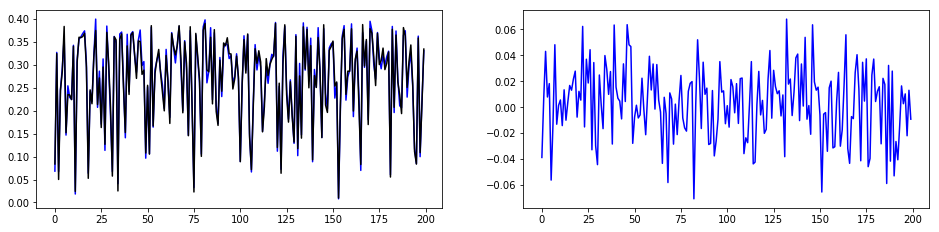

In [39]:
cal_dict["angles_polarimeter"] = angles
cal_dict["intensity_polarimeter"] = Iexp
cal_dict, Mfiltered, results_dict = pol.Analysis_Measurement_0D(cal_dict, type_output='all', verbose=False)
print("  - Normalization factor      = {:.4f}".format(   results_dict['normalization']))
print("  - Error                     = {:.3f} %".format( results_dict['error_norm'] * 100))
print("   - Normalized Mueller matrix:")
print(Mfiltered)

I_fit = cal.model_polarimeter_data(M, Ifuente, angles, Iexp)
diff = (Iexp - I_fit) / Iexp.max()
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(cal_dict['intensity_polarimeter'], 'b')
plt.plot(I_fit, 'k')
plt.subplot(2, 2, 2)
plt.plot(diff, 'b')

Ahora voy a probar con datos ordenados.

In [42]:
Nx = 15
Ny = 15
N = [Nx, Ny]
angles_x = np.linspace(0,np.pi, Nx)
angles_y = np.linspace(0,np.pi, Ny)
angles_cal = [0, 0, angles_x, angles_y]
angles_cal_all = [0, 0, 0, angles_x, angles_y]

Iexp = pol.Intensity_Rotating_Elements(Mall, angles_cal_all, Ifuente) + np.random.normal(size=N, scale=A_noise)
angles_pol, I_pol = cal.adapt_step_to_polarimeter(angles_x, angles_y, Iexp)

  - Normalization factor      = 0.6801
  - Error                     = 131.772 %
   - Normalized Mueller matrix:
Filtered = 
  [+1.0000, +0.0000, -0.0000, -0.0000]
  [-0.0000, -0.2030, +0.3517, +0.3697]
  [+0.0000, +0.0604, +0.3237, +0.3878]
  [-0.0000, +0.0026, +0.3979, +0.3158]



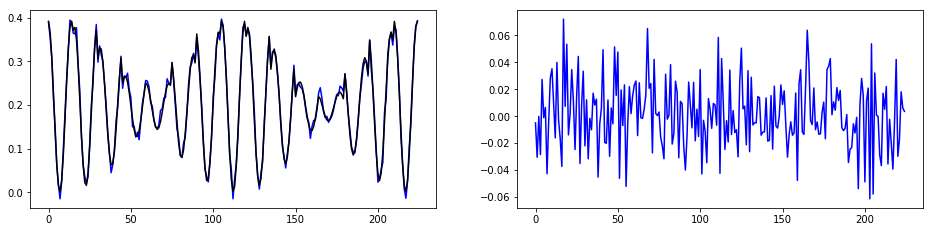

In [44]:
cal_dict["angles_polarimeter"] = angles_pol
cal_dict["intensity_polarimeter"] = I_pol
cal_dict, Mfiltered, results_dict = pol.Analysis_Measurement_0D(cal_dict, type_output='all', verbose=False)
print("  - Normalization factor      = {:.4f}".format(   results_dict['normalization']))
print("  - Error                     = {:.3f} %".format( results_dict['error_norm'] * 100))
print("   - Normalized Mueller matrix:")
print(Mfiltered)

I_fit = cal.model_polarimeter_data(M, Ifuente, angles_pol, I_pol)
diff = (I_pol - I_fit) / I_pol.max()
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(cal_dict['intensity_polarimeter'], 'b')
plt.plot(I_fit, 'k')
plt.subplot(2, 2, 2)
plt.plot(diff, 'b')